In [143]:
import pandas as p
data = p.read_csv('E0 (1).csv',header="infer")

In [144]:
data = data.drop(data.ix[:, 'HC':'PSCA'].columns, axis = 1)
data = data.drop('Date',axis=1)
#data = data.drop('Time',axis=1)
data = data.drop('Div',axis=1)
data = data.drop('Referee',axis=1)
difference = data['FTHG']- data['FTAG']
data.insert(8, "Difference", difference, True)
data.HomeTeam = list(zip(data.HomeTeam, data.AwayTeam))
data = data.drop('AwayTeam',axis=1)
data = data.drop('HomeTeam',axis=1)
data = data.drop('FTR',axis=1)
data = data.drop('HTR',axis=1)
data

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,FTHG,FTAG,HTHG,HTAG,Difference,HS,AS,HST,AST,HF,AF
0,2,1,1,0,1,8,13,6,4,11,8
1,2,0,1,0,2,12,10,4,1,11,9
2,0,2,0,1,-2,15,10,6,9,9,11
3,0,3,0,2,-3,6,13,1,4,9,8
4,1,2,1,2,-1,15,15,2,5,11,12
5,2,0,1,0,2,19,6,5,0,10,16
6,2,2,1,1,0,11,6,4,5,8,7
7,0,2,0,1,-2,9,17,3,8,11,14
8,4,0,2,0,4,18,5,8,2,14,9
9,0,0,0,0,0,18,16,3,6,10,9


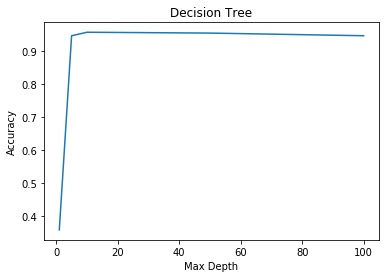

10


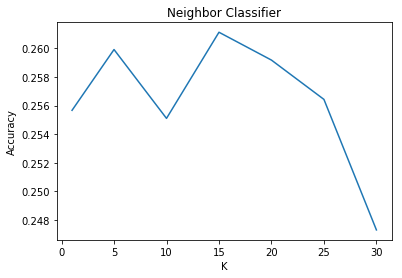

15


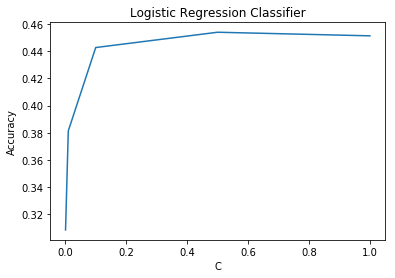

0.5


In [145]:
from sklearn.model_selection import train_test_split

Y = data['Difference']
X = data.drop('Difference',axis=1)

import numpy as np 
from sklearn import tree
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import linear_model 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline

maxdepths = [1,5,10,50,100]
accuracy = []
for param in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=param)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())

plt.plot(maxdepths, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.show()

best1 = 0
for i in accuracy:
    if i >= best1:
        best1 = i 
depth1 = maxdepths[accuracy.index(best1)]
print(depth1)

Ks = [1, 5, 10, 15, 20, 25, 30]
accuracyK = []
for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracyK.append(scores.mean())

plt.plot(Ks, accuracyK)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Neighbor Classifier')
plt.show()

best2 = 0
for i in accuracyK:
    if i >= best2:
        best2 = i
depth2 = Ks[accuracyK.index(best2)]
print(depth2)

maxdepths = [0.001, 0.01, 0.1, 0.5, 1]
accuracy = []
for c in maxdepths:
    clf = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())

plt.plot(maxdepths, accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Classifier')
plt.show()

best3 = 0
for i in accuracy:
    if i >= best3:
        best3 = i 
depth3 = maxdepths[accuracy.index(best3)]

print(depth3)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


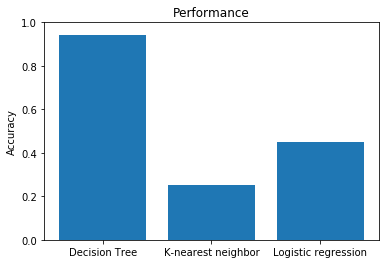

In [154]:

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0, random_state=1)

sc = []
dataTest = p.read_csv('E0.csv',header="infer")
dataTest = dataTest.drop(dataTest.ix[:, 'HC':'AvgCAHA'].columns, axis = 1)
dataTest = dataTest.drop('Date',axis=1)
dataTest = dataTest.drop('Time',axis=1)
dataTest = dataTest.drop('Div',axis=1)
dataTest = dataTest.drop('Referee',axis=1)
differenceT = dataTest['FTHG']- dataTest['FTAG']
dataTest.insert(8, "Difference", differenceT, True)
dataTest.HomeTeam = list(zip(dataTest.HomeTeam, dataTest.AwayTeam))
dataTest = dataTest.drop('AwayTeam',axis=1)
dataTest = dataTest.drop('HomeTeam',axis=1)
dataTest = dataTest.drop('FTR',axis=1)
dataTest = dataTest.drop('HTR',axis=1)

Y_test = dataTest['Difference']
X_test = dataTest.drop('Difference',axis=1)

clf = tree.DecisionTreeClassifier(max_depth=depth1)
clf.fit(X, Y)
Y_predTest1 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest1))


clf = KNeighborsClassifier(n_neighbors=depth2)
clf.fit(X, Y)
Y_predTest2 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest2))

clf = linear_model.LogisticRegression(C=depth3)
clf.fit(X, Y)
Y_predTest3 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest3))

objects = ('Decision Tree', 'K-nearest neighbor', 'Logistic regression')
y_pos = np.arange(len(objects))

plt.bar(y_pos, sc)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Performance')
plt.ylim(0,1)

plt.show()